![Perth_House.png](https://datasciencecc.s3.us-east-2.amazonaws.com/Perth_House.png)


**Es importante resaltar que este laboratorio es con fines personales y que sus resultados no tiene que reflejarse completamente a la realidad**


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;"> 1. Introducción:</p>


Debido al incremento en las ventas de viviendas en el suroeste de Australia, específicamente en la ciudad de Perth, y al desconocimiento sobre la valorización de muchas propiedades según sus características particulares, se ha identificado la necesidad de evaluar diversos modelos predictivos para estimar el precio de las viviendas en esa localidad. La base de datos utilizada para este análisis se puede consultar [aqui](https://www.kaggle.com/datasets/syuzai/perth-house-prices/data). Además, se realizará un análisis de las variables más importantes para la construcción del modelo.

A continuación, se presenta un resumen de las variables incluidas en la base de datos:


- ADDRESS : Dirección fisica del inmueble
- SUBURB : Suburbio o barrio específico dentro de Perth donde se ubica la propiedad.
- PRICE : Precio de venta de cada propiedad [AUD]
- BEDROOMS : Numero de dormitorios
- BATHROOMS : Numero de baños
- GARAGE : Numero de garajes
- LAND_AREA : Area total del terreno [$m^2$]
- FLOOR_AREA : Area construida [$m^2$]
- BUILD_YEAR : Año en que se construyó la propiedad.
- CBD_DIST : Distancia desde el centro de Perth [m]
- NEAREST_STN : Estación de transporte público más cercana a la propiedad.
- NEAREST_STN_DIST : Distancia a la estación de transporte mas cerca a la propiedad [m]
- DATE_SOLD : Año y mes en que se vendió la propiedad.
- POSTCODE : Codigo postal del area
- LATITUDE : Latitud de la ubicación geográfica de la propiedad.
- LONGITIDE : Longitud de la ubicación geográfica de la propiedad.
- NEAREST_SCH : Escuela más cercana a la propiedad.
- NEAREST_SCH_DIST : Distancia a la escuela más cercana [m].
- NEAREST_SCH_RANK : Clasificación de la escuela más cercana a la propiedad.


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;"> 2. Importación de datos y analisis preliminar:</p>


In [1]:
# Manipulación y análisis de datos
import numpy as np
import pandas as pd 

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades del sistema operativo
import os

# Estadísticas
from scipy.stats import gaussian_kde

# División de datos y preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluación del modelo
from sklearn import metrics

# Ignorar advertencias
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('all_perth_310121.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [3]:
data.head(5)

ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.115900  115.842450   
1              4900  02-2019\r      6167 -32.193470  115.859554   
2              1900  06-2015\r      6111 -32.120578  115.993579   
3              3600  07-2018\r      6056 -31.900547  116.038009   
4              2000  11-2016\r      6054 -31.885790  115.947780   

                    NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0   LAKELAND SENIOR HIGH SCHOOL          0.828339               NaN  
1                ATWELL COLLEGE          5.524324             129.0  
2  KELMSCOTT SENIOR HIGH SCHOOL          1.649178             113.0  
3  SWAN VIEW SENIOR HIGH SCHOOL          1.571401               NaN  
4                 KIARA COLLEGE          1.514922               NaN

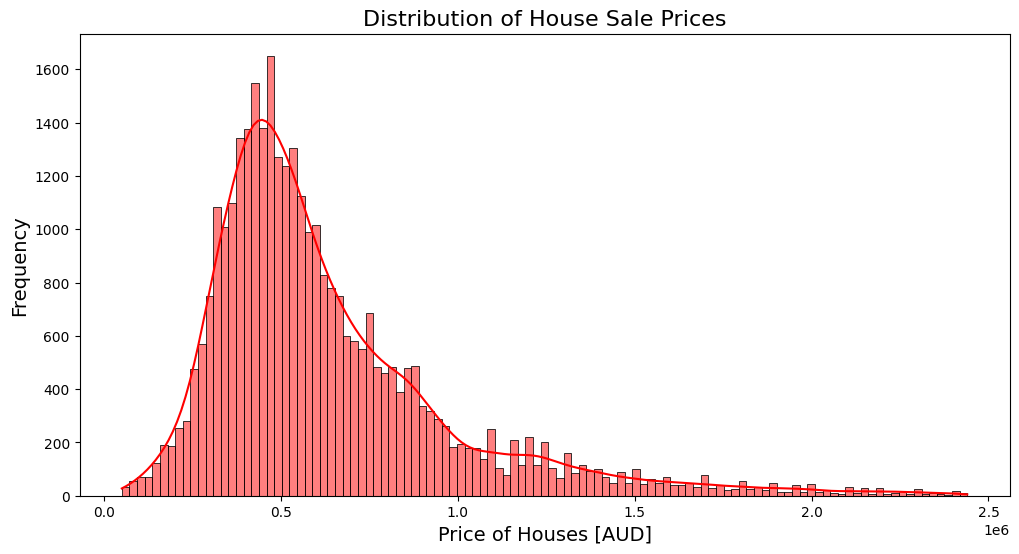

count    3.365600e+04
mean     6.370720e+05
std      3.558256e+05
min      5.100000e+04
25%      4.100000e+05
50%      5.355000e+05
75%      7.600000e+05
max      2.440000e+06
Name: PRICE, dtype: float64

In [4]:
price = data['PRICE']
plt.figure(figsize=(12, 6))
sns.histplot(price, kde=True, color='red')
plt.title('Distribution of House Sale Prices', fontsize=16)
plt.xlabel('Price of Houses [AUD]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
price.describe()

El histograma muestra una distribución sesgada hacia la derecha, con una mayor concentración de valores en las casas menos costosas. La media del precio de las viviendas en Perth es de 637,072 dólares australianos, mientras que la mediana es de 535,500 dólares australianos. Esto indica que la mayoría de las casas en la muestra tienen un precio inferior a la media, lo que sugiere la presencia de algunas propiedades de mayor valor que elevan el promedio.


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">3. Preprocesamiento y limpieza de datos:</p>


In [5]:
color_scale = [(0, 'orange'), (1, 'red')]
fig = px.scatter_mapbox(data, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        hover_name="ADDRESS", 
                        hover_data=["ADDRESS", "PRICE"],
                        color="PRICE",
                        color_continuous_scale="OrRd", 
                        size="PRICE",
                        size_max=10, 
                        zoom=10, 
                        height=800,
                        width=950)


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

Se observa que las propiedades ubicadas cerca de las playas, costas y a lo largo del río Swan tienden a tener un valor superior al promedio.

A continuación, se identificarán las variables relevantes para nuestro modelo de machine learning, teniendo en cuenta la cantidad de datos disponibles en cada atributo de la muestra. Posteriormente, se dividirán las variables en categorías según su tipo (object, float, int) para evaluar su relevancia y determinar si son esenciales para el modelo.


In [6]:
X = data
{column: len(X[column].unique()) for column in X.select_dtypes('object').columns}

{'ADDRESS': 33566,
 'SUBURB': 321,
 'NEAREST_STN': 68,
 'DATE_SOLD': 350,
 'NEAREST_SCH': 160}

In [7]:
{column: len(X[column].unique()) for column in X.select_dtypes('int').columns}

{'PRICE': 2297,
 'BEDROOMS': 10,
 'BATHROOMS': 8,
 'LAND_AREA': 4372,
 'FLOOR_AREA': 528,
 'CBD_DIST': 595,
 'NEAREST_STN_DIST': 1189,
 'POSTCODE': 114}

Los atributos “ADDRESS” y “POSTCODE” no son significativos para nuestro modelo de machine learning, ya que solo proporcionan información sobre la identificación y ubicación precisa de la propiedad en términos sociales, sin aportar valor predictivo relevante.


In [8]:
X = X.drop(["ADDRESS","POSTCODE"],axis=1)
X.head(5)

SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0  South Lake  565000         4          2     2.0        600         160   
1       Wandi  365000         3          2     2.0        351         139   
2     Camillo  287000         3          1     1.0        719          86   
3    Bellevue  255000         2          1     2.0        651          59   
4   Lockridge  325000         4          1     2.0        466         131   

   BUILD_YEAR  CBD_DIST               NEAREST_STN  NEAREST_STN_DIST  \
0      2003.0     18300  Cockburn Central Station              1800   
1      2013.0     26900           Kwinana Station              4900   
2      1979.0     22600           Challis Station              1900   
3      1953.0     17900           Midland Station              3600   
4      1998.0     11200        Bassendean Station              2000   

   DATE_SOLD   LATITUDE   LONGITUDE                   NEAREST_SCH  \
0  09-2018\r -32.115900  115.842450   LAKELAND SENIOR HIGH SCHOOL   
1  02-2019\r -32.193470  115.859554                ATWELL COLLEGE   
2  06-2015\r -32.120578  115.993579  KELMSCOTT SENIOR HIGH SCHOOL   
3  07-2018\r -31.900547  116.038009  SWAN VIEW SENIOR HIGH SCHOOL   
4  11-2016\r -31.885790  115.947780                 KIARA COLLEGE   

   NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0          0.828339               NaN  
1          5.524324             129.0  
2          1.649178             113.0  
3          1.571401               NaN  
4          1.514922               NaN

Para identificar los valores nulos en cada atributo y su porcentaje respecto al total de los datos, se utiliza el siguiente gráfico.


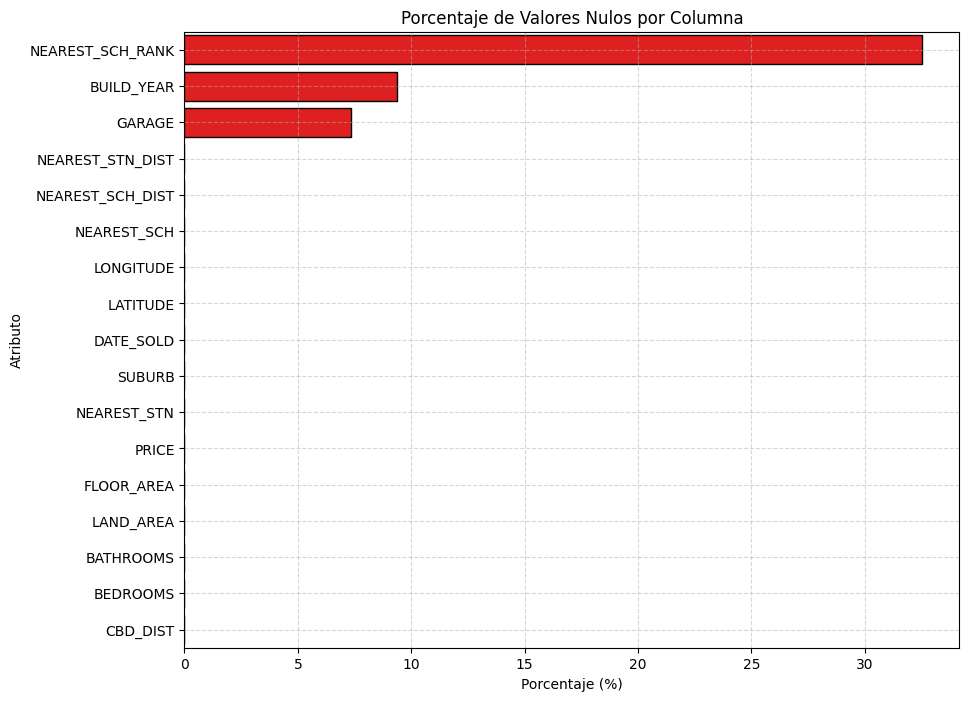

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
nan = (X.isnull().sum() / len(X) * 100).sort_values(ascending=False)
sns.barplot(x=nan, y=nan.index, edgecolor='k', color='red')
plt.title("Porcentaje de Valores Nulos por Columna")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Atributo")
ax.grid(ls='--', alpha=0.5)
plt.show()

En teoría, cuando se tienen atributos con menos del 70% de los datos completos, se puede optar por eliminar dicha variable, como es el caso de "**NEAREST_SCH_RANK**". Para aquellas variables que presentan valores nulos pero no superan el 30% de los datos, se pueden rellenar utilizando las siguientes opciones:

    • [x]	La media de todos los valores de la variable
    • [x]	La moda de todos los valores de la variable
    • []	La mediana de todos los valores de la variable
    • []	El promedio entre el valor superior e inferior
    • []	El mismo valor que el superior o el inferior

En este caso, rellenamos los datos faltantes en las variables **_"BUILD_YEAR" y "GARAGE"_** con la opción seleccionada anteriormente, respectivamente.

Para obtener más información sobre las variables, podemos consultar los metadatos. En caso de no encontrar información relevante, se pueden visualizar los datos de cada variable:


In [10]:
X = X.drop('NEAREST_SCH_RANK',axis=1)

Dado que la información disponible sugiere que la variable "**GARAGE**" indica la cantidad de vehículos que pueden estacionarse en el garaje, los valores nulos se sustituirán por la mediana de esta variable. Por otro lado, los valores nulos de la variable "**BUILD_YEAR**" se reemplazarán por la mediana del año de construcción de todas las propiedades en venta.


In [11]:
X['GARAGE'] = X['GARAGE'].fillna(X['GARAGE'].median())  
X['BUILD_YEAR'] = X['BUILD_YEAR'].fillna(X['BUILD_YEAR'].median())

In [12]:
X.isna().mean()

SUBURB              0.0
PRICE               0.0
BEDROOMS            0.0
BATHROOMS           0.0
GARAGE              0.0
LAND_AREA           0.0
FLOOR_AREA          0.0
BUILD_YEAR          0.0
CBD_DIST            0.0
NEAREST_STN         0.0
NEAREST_STN_DIST    0.0
DATE_SOLD           0.0
LATITUDE            0.0
LONGITUDE           0.0
NEAREST_SCH         0.0
NEAREST_SCH_DIST    0.0
dtype: float64

Para extraer la fecha de venta de la propiedad, convertimos el dato “DATE_SOLD” al formato datetime.


In [13]:
X['DATE_SOLD'] = pd.to_datetime(X['DATE_SOLD'])
X['DATE_YEAR'] = X['DATE_SOLD'].apply(lambda x: x.year)
X['DATE_MONTH'] = X['DATE_SOLD'].apply(lambda x: x.month)
X = X.drop('DATE_SOLD',axis=1)

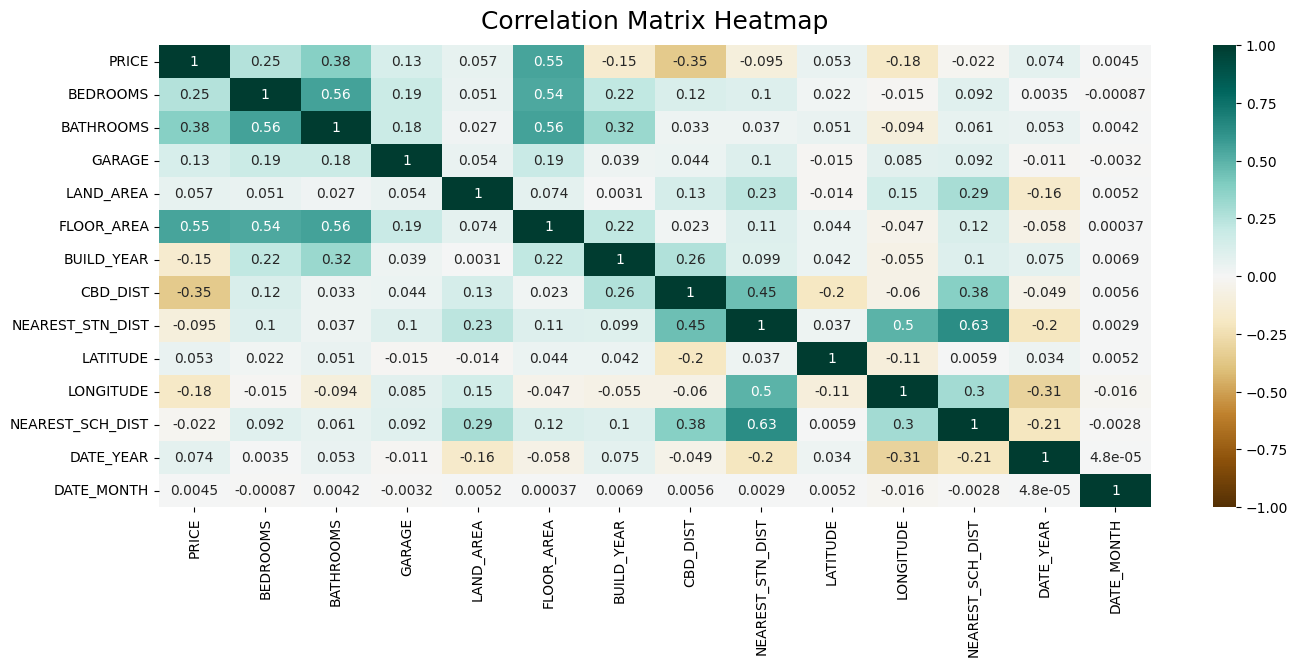

In [14]:
data_num = X.drop(X.select_dtypes(include=['object']).columns,axis=1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix Heatmap', fontdict={'fontsize':18}, pad=12);

A partir de la gráfica de correlación, se observa que existe una fuerte correlación entre el aumento del precio y el área construida. Además, la cantidad de baños, dormitorios y espacios disponibles en el garaje también son factores importantes que influyen en el incremento del costo de la vivienda.


Utilizamos la función "**_get_dummies_**" para facilitar el manejo de las variables categóricas en nuestro modelo de Machine Learning. Esta función transforma las variables categóricas en variables numéricas mediante la creación de variables ficticias (dummy variables), lo que permite que el modelo procese estos datos de manera efectiva.


In [15]:
X = pd.get_dummies(X, columns=['SUBURB', 'NEAREST_STN', 'NEAREST_SCH', 'GARAGE'], dtype=float)
#X = X.drop(['SUBURB', 'NEAREST_STN', 'NEAREST_SCH', 'GARAGE'],axis=1)

In [16]:
y = X['PRICE']
X = X.drop('PRICE',axis=1)

# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">4. Machine Learning:</p>


## <code style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Training:</code>


In [17]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size= 0.7, shuffle=True, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## <code style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Results:</code>


In [18]:
evaluation_results = [] 
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Training score : 0.7827426543069627
Testing score : -1.0724901823332613e+21
R2 score : -1.0724901823332613e+21
MAE : 182518039944646.6
MSE : 1.388795147325387e+32
RMSE : 1.1784715301293396e+16


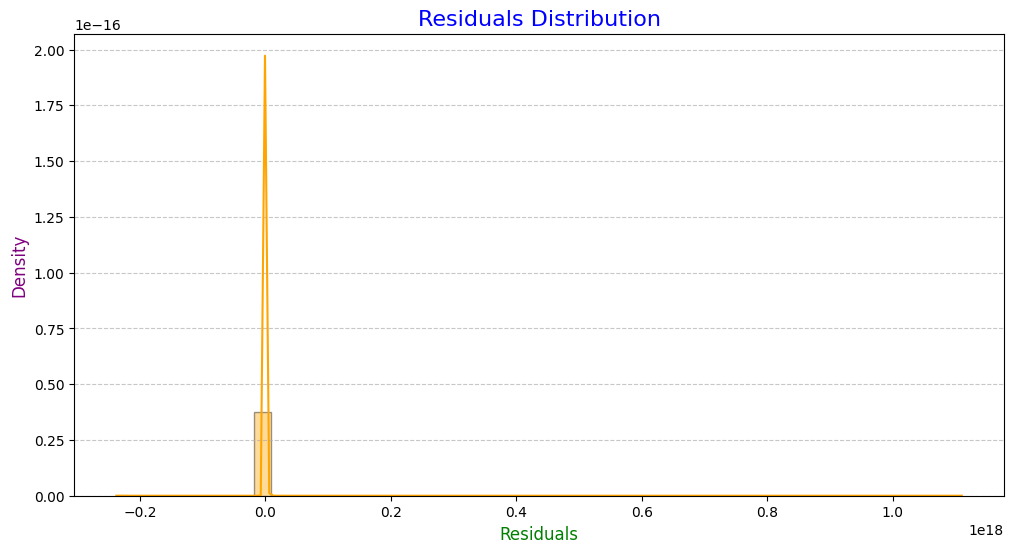

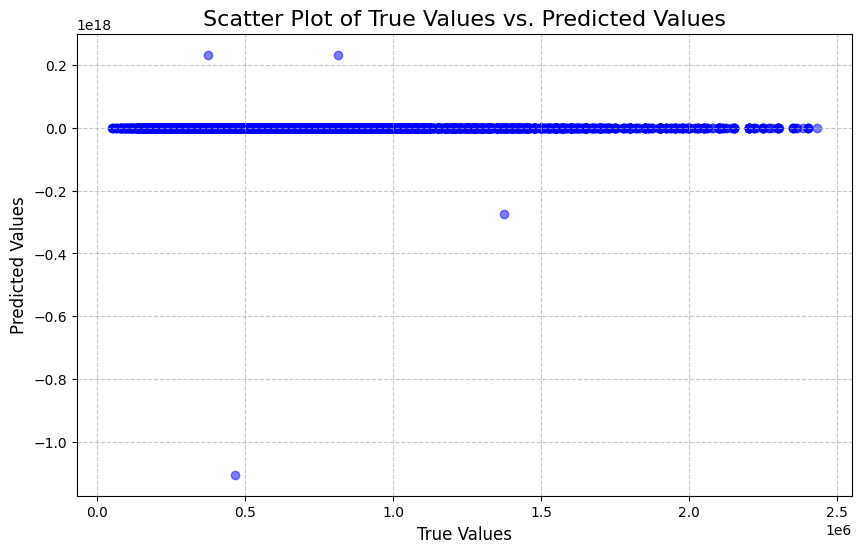

In [19]:
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train, y_train, X_test, y_test)

Training score : 0.7827894371872159
Testing score : 0.7773487350963242
R2 score : 0.7773487350963242
MAE : 109971.17916344383
MSE : 28831685486.515656
RMSE : 169798.95608193724


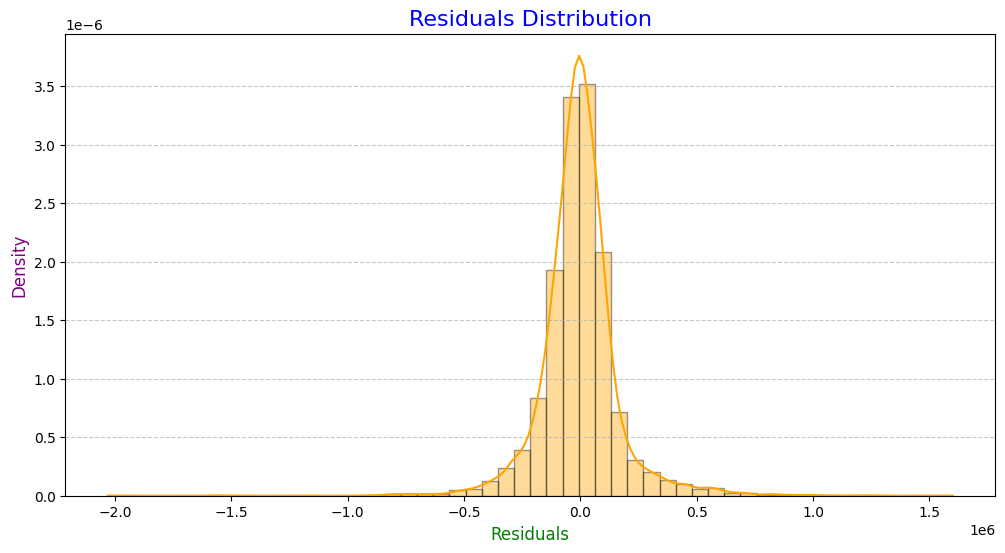

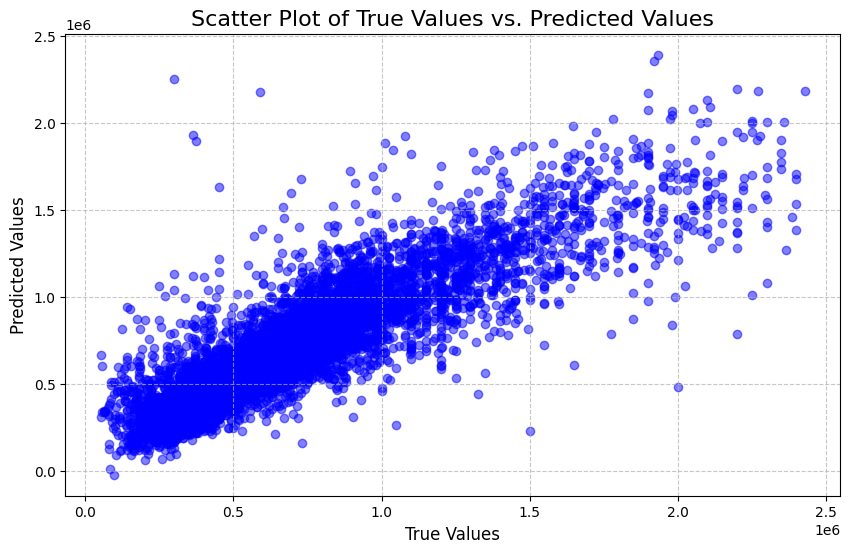

In [20]:
evaluate_model_regression(Ridge(), 'Ridge', X_train, y_train, X_test, y_test)

Training score : 0.7827866668493187
Testing score : 0.7773330829190522
R2 score : 0.7773330829190522
MAE : 109972.06047444066
MSE : 28833712327.245625
RMSE : 169804.92433155648


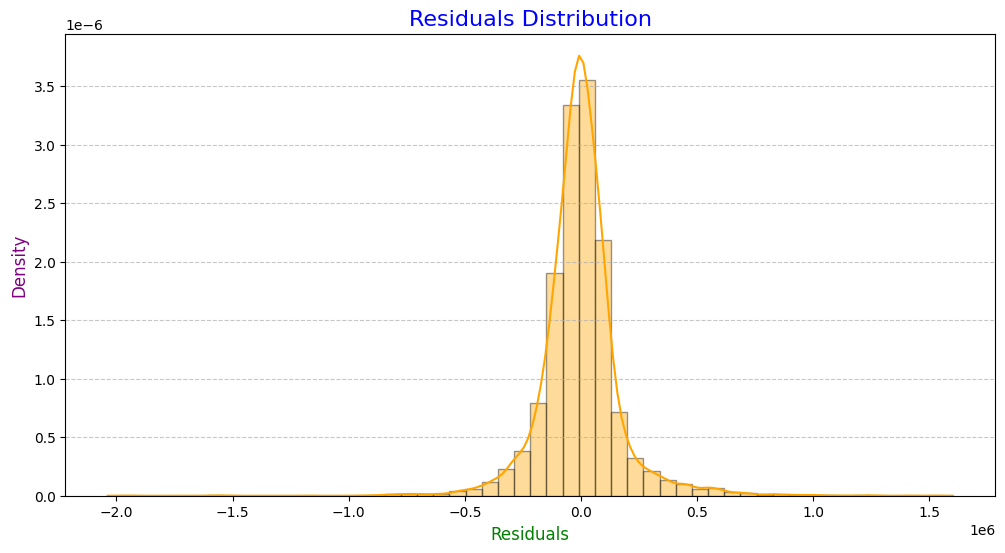

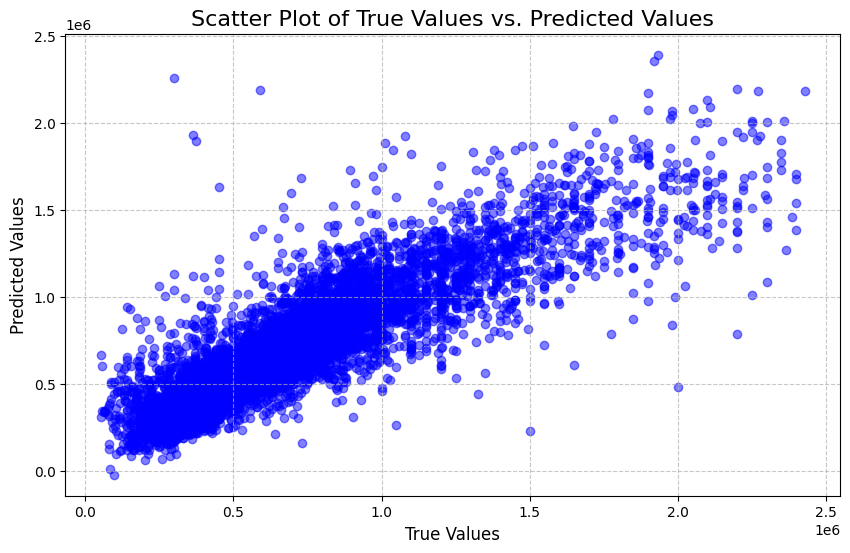

In [21]:
evaluate_model_regression(Lasso(), 'Lasso', X_train, y_train, X_test, y_test)

Training score : -0.07889932531432264
Testing score : -0.08880575270045621
R2 score : -0.08880575270045621
MAE : 245627.91587197362
MSE : 140992259942.24405
RMSE : 375489.36062456423


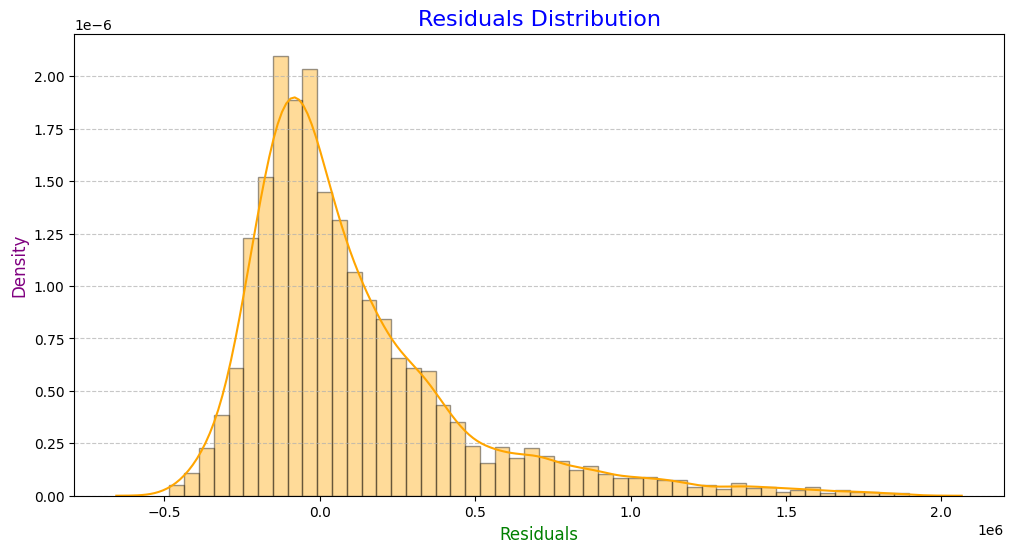

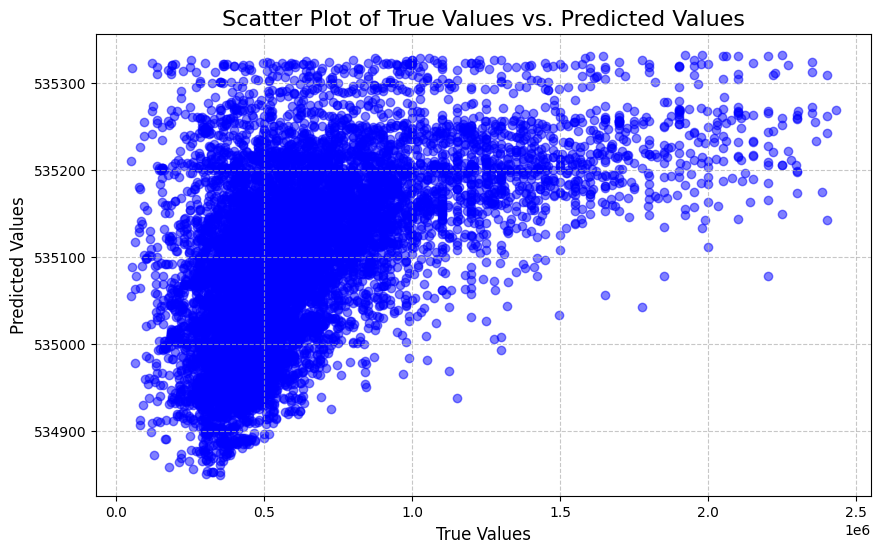

In [22]:
evaluate_model_regression(SVR(), 'SVM', X_train, y_train, X_test, y_test)

Training score : 1.0
Testing score : 0.6890050018282767
R2 score : 0.6890050018282767
MAE : 122442.53402000594
MSE : 40271542939.78865
RMSE : 200677.70912532526


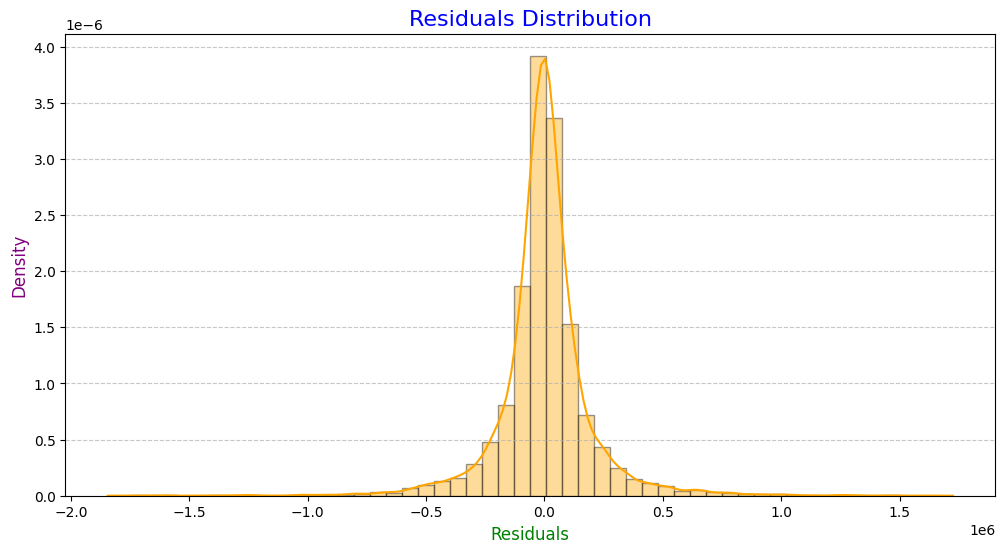

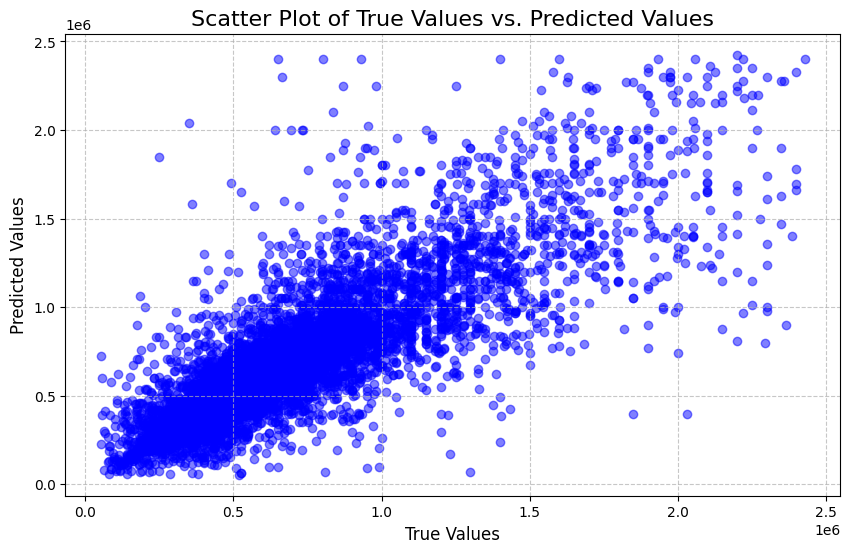

In [23]:
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

Training score : 0.9202319979667664
Testing score : 0.8460689783096313
R2 score : 0.8460689783096313
MAE : 87210.50330495367
MSE : 19932927051.54872
RMSE : 141184.01839991918


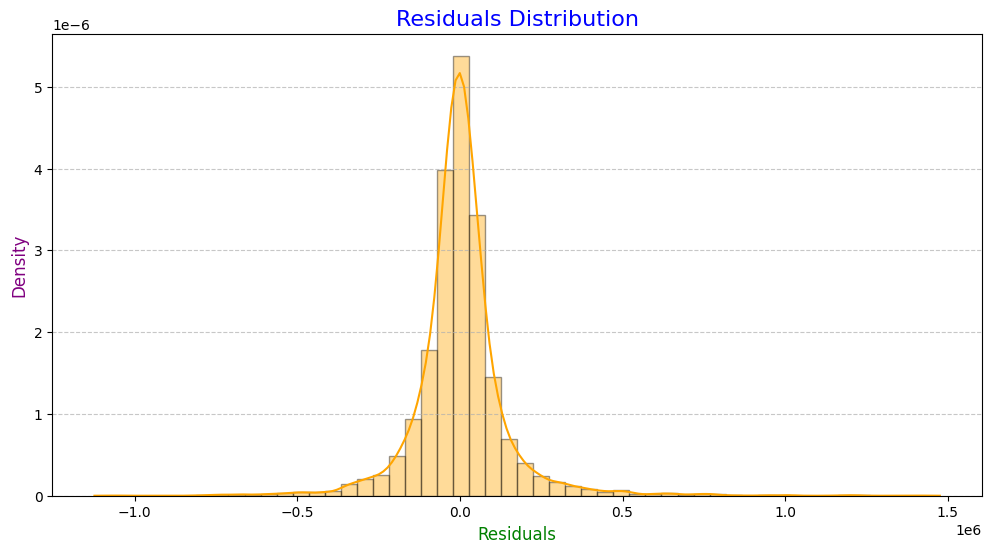

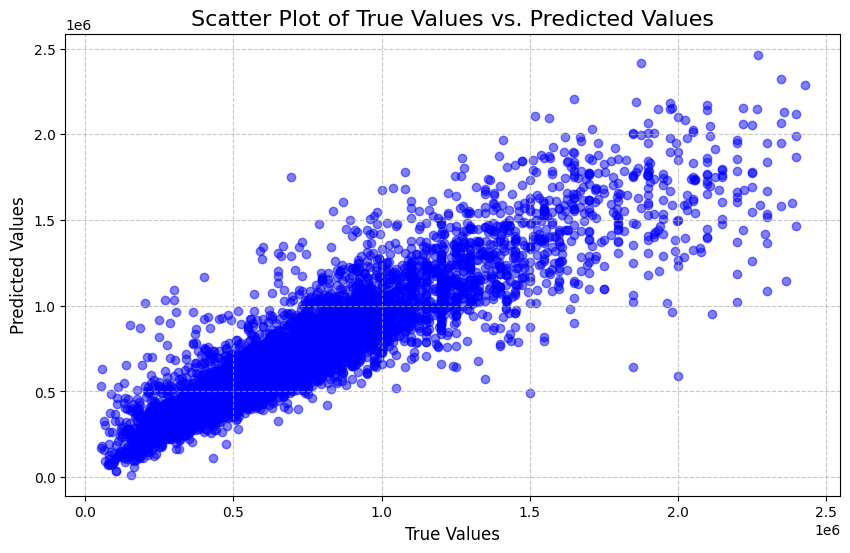

In [24]:
evaluate_model_regression(XGBRegressor(), 'XG Boost', X_train, y_train, X_test, y_test)

In [25]:
%%capture output
evaluate_model_regression(CatBoostRegressor(), 'Cat Boost', X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3522
[LightGBM] [Info] Number of data points in the train set: 23559, number of used features: 532
[LightGBM] [Info] Start training from score 634738.593998
Training score : 0.8850830008838828
Testing score : 0.8520956111037813
R2 score : 0.8520956111037813
MAE : 86452.65062243013
MSE : 19152520083.70996
RMSE : 138392.630164001


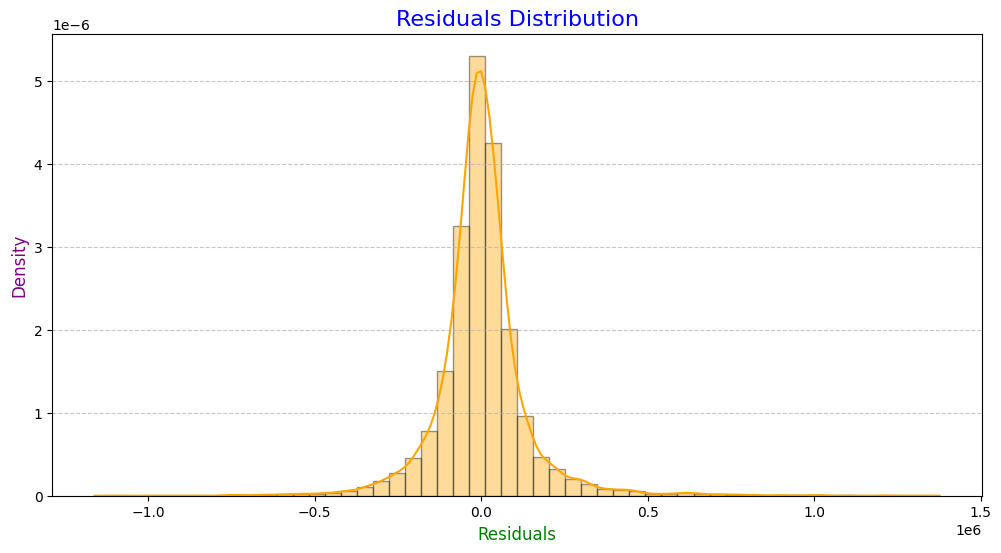

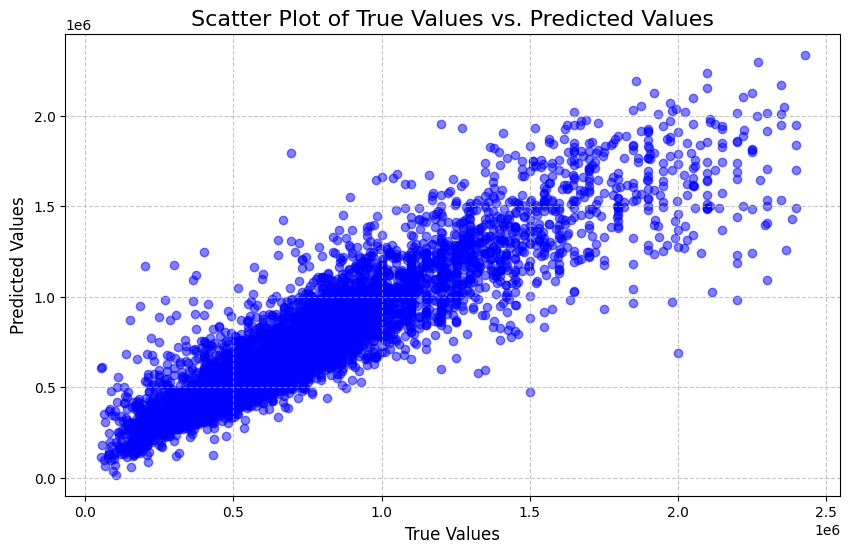

In [26]:
evaluate_model_regression(LGBMRegressor(), 'LGBM', X_train, y_train, X_test, y_test)

Según los resultados obtenidos en la evaluación de los modelos de Machine Learning, se puede inferir que los valores presentados por la regresión lineal están asociados a la evaluación de cuatro puntos en particular que superan los valores de 8 \times 10^{17}. Debido a que este modelo muestra resultados atípicos, se tomará la decisión de reemplazar el "**Testing Score**" de "**Linear Regression**" por un valor de -1. Este ajuste se realiza para facilitar la comparación con los demás modelos, manteniendo así la integridad del análisis.


In [27]:
df_results = pd.DataFrame(evaluation_results)
pd.options.display.float_format = "{:,.3f}".format
df_results = df_results.sort_values(by='Testing Score',ascending=False)
df_results = df_results.reset_index(drop=True)
df_results.loc[df_results['Testing Score'] < -1, 'Testing Score'] = -0.1
df_results

Model  Training Score  Testing Score
0          Cat Boost           0.904          0.864
1               LGBM           0.885          0.852
2           XG Boost           0.920          0.846
3              Ridge           0.783          0.777
4              Lasso           0.783          0.777
5      Decision Tree           1.000          0.689
6                SVM          -0.079         -0.089
7  Linear Regression           0.783         -0.100

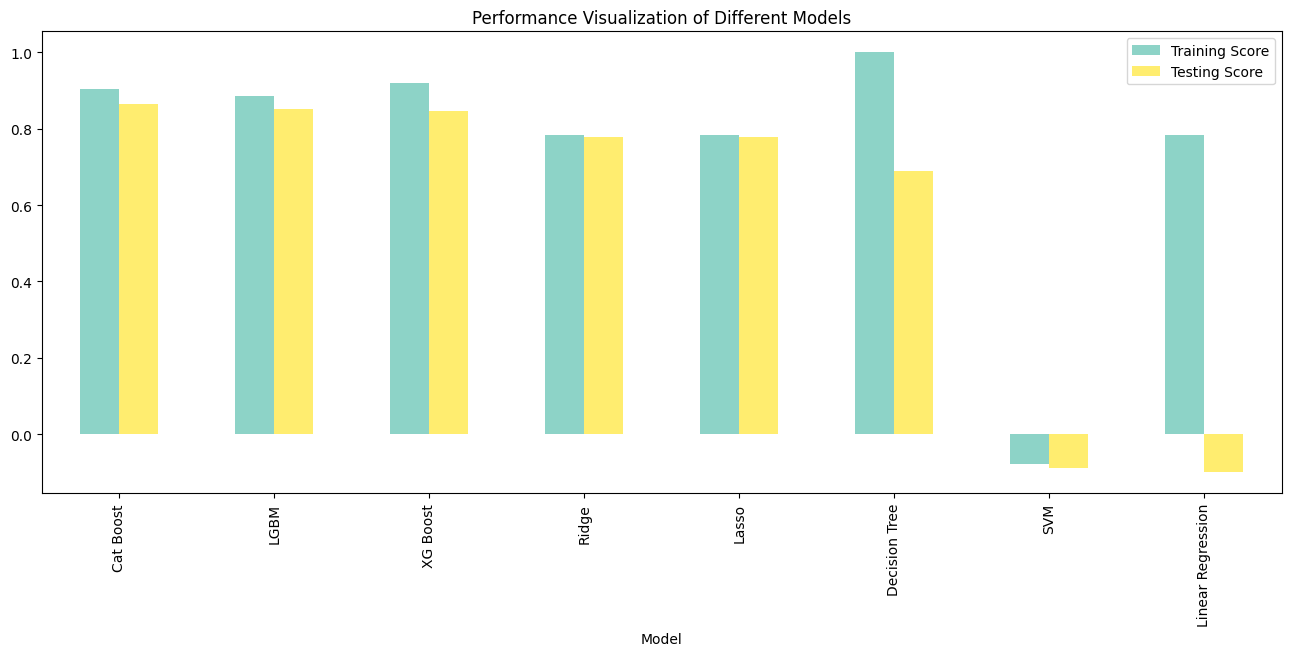

In [28]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">5. Conclusiones:</p>


Después de evaluar los modelos de regresión utilizados, el modelo CatBoostRegressor() ha mostrado los mejores resultados. Por lo tanto, procederemos a buscar los valores óptimos de los hiperparámetros con el fin de mejorar aún más el rendimiento del modelo. Este enfoque nos permitirá concluir nuestro proyecto con una mayor eficiencia, al tener en cuenta los hiperparámetros más efectivos.


In [29]:
%%capture output
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'iterations': [100, 200, 500],
    'depth': [3, 5, 10],}
grid_search = GridSearchCV(CatBoostRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [30]:
print(f'Best score : {best_score}')
print(f'Best Params for CatBoostRegressor: {best_params}')
best_score,best_params

Best score : 0.8493898727767639
Best Params for CatBoostRegressor: {'depth': 10, 'iterations': 500, 'learning_rate': 0.1}


(0.8493898727767639, {'depth': 10, 'iterations': 500, 'learning_rate': 0.1})

In [31]:
%%capture output
b_model = CatBoostRegressor(**best_params)
b_model.fit(X_train,y_train)
y_predict = b_model.predict(X_test)

In [32]:
metrics.r2_score(y_test, y_predict)

0.8652985733378737